# *ETL DEL DATASET DE DATOS PÚBLICOS SRI PRESIÓN FÍSCAL*

1. Instalacion de dependecias y librerías

In [ ]:
!pip install pandas==2.2.2 matplotlib==3.8.4 seaborn==0.13.2 gspread==6.0.2 gspread_dataframe==3.3.0 google-auth==2.29.0 google-cloud-bigquery==3.21.0

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, project = default()

# Autoriza la conexión a Google Sheets
gc = gspread.authorize(creds)

# Monta Google Drive para acceder a archivos en tu Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Carga y procesamiento de datos


In [3]:
import requests
import pandas as pd
from io import StringIO

# Define API query URL (CSV with labels format)
url = "https://sdmx.oecd.org/public/rest/data/OECD.CTP.TPS,DSD_REV_LAC@DF_REVECU,2.0/..S13....A?startPeriod=2014&dimensionAtObservation=AllDimensions"

# Fetch data
response = requests.get(url)

# Load into pandas DataFrame
df = pd.read_csv(StringIO(response.text))

# Display first few rows
print(df.head())

Empty DataFrame
Columns: [<?xml version="1.0" encoding="utf-8"?><!--NSI Web Service v8.19.7.0--><message:GenericData xmlns:footer="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/message/footer" xmlns:generic="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic" xmlns:message="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/message" xmlns:common="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/common" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xml="http://www.w3.org/XML/1998/namespace"><message:Header><message:ID>IREF016364</message:ID><message:Test>false</message:Test><message:Prepared>2025-06-19T17:21:42</message:Prepared><message:Sender id="Disseminate_Final_DMZ" /><message:Structure structureID="OECD_CTP_TPS_DSD_REV_LAC_at_DF_REVECU_2_0" dimensionAtObservation="AllDimensions"><common:StructureUsage><Ref agencyID="OECD.CTP.TPS" id="DSD_REV_LAC@DF_REVECU" version="2.0" /></common:StructureUsage></message:Structure><message:DataSetAction>Information</

3. Visualizacion de los datos

In [5]:
# 1. Mostrar columnas y primeras filas
print("Columnas disponibles:")
print(df.columns.tolist())
print("\nPrimeras 5 filas del DataFrame:")
print(df.head())



Columnas disponibles:
['<?xml version="1.0" encoding="utf-8"?><!--NSI Web Service v8.19.7.0--><message:GenericData xmlns:footer="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/message/footer" xmlns:generic="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic" xmlns:message="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/message" xmlns:common="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/common" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xml="http://www.w3.org/XML/1998/namespace"><message:Header><message:ID>IREF016364</message:ID><message:Test>false</message:Test><message:Prepared>2025-06-19T17:21:42</message:Prepared><message:Sender id="Disseminate_Final_DMZ" /><message:Structure structureID="OECD_CTP_TPS_DSD_REV_LAC_at_DF_REVECU_2_0" dimensionAtObservation="AllDimensions"><common:StructureUsage><Ref agencyID="OECD.CTP.TPS" id="DSD_REV_LAC@DF_REVECU" version="2.0" /></common:StructureUsage></message:Structure><message:DataSetAction>Information</me

In [8]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# 1) Monta tu Drive (si no lo hiciste o para forzar remonte)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 2) Lista archivos en /content para ver sus nombres exactos
import os
print("Archivos en /content:")
print(os.listdir('/content'))

# 3) Define la ruta destino en tu Drive (asegúrate de que esta carpeta exista)
dest_folder = '/content/drive/MyDrive/Colab Notebooks'  # <— ajústala a la ruta real que quieras

# 4) Copia los archivos “tal cual” se llaman en /content
#    Cámbialos si ves nombres distintos en el listado anterior
!cp "/content/OECD.CTP.TPS,DSD_REV_LAC@DF_REVECU,2.0+..S13....A.csv" "{dest_folder}/presion_fiscal_s13.csv"
!cp "/content/OECD.CTP.TPS,DSD_REV_LAC@DF_REVECU,2.0+all.csv"            "{dest_folder}/presion_fiscal_all.csv"

print("Archivos en la carpeta de Drive:")
print(os.listdir(dest_folder))


Mounted at /content/drive
Archivos en /content:
['.config', 'OECD.CTP.TPS,DSD_REV_LAC@DF_REVECU,2.0+all.csv', 'OECD.CTP.TPS,DSD_REV_LAC@DF_REVECU,2.0+..S13....A.csv', 'drive', 'sample_data']
Archivos en la carpeta de Drive:
['Untitled1.ipynb', 'Untitled0.ipynb', 'Untitled2.ipynb', 'primera pruebda.ipynb', 'cosos.ipynb', 'presion_fiscal_s13.csv', 'presion_fiscal_all.csv']


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Define la carpeta de Drive donde están los CSV
drive_folder = '/content/drive/MyDrive/Colab Notebooks'

# 2) Rutas completas a los archivos
path_s13 = f'{drive_folder}/presion_fiscal_s13.csv'
path_all = f'{drive_folder}/presion_fiscal_all.csv'

# 3) Carga de datos
df_s13 = pd.read_csv(path_s13)
df_all = pd.read_csv(path_all)

# 4) Inspección rápida (opcional)
print("Columnas S13:", df_s13.columns.tolist())
print("Columnas ALL:", df_all.columns.tolist())

# 5) Filtrar Ecuador y serie total en S13
df_ecu = (
    df_s13
    .loc[(df_s13['REF_AREA'] == 'ECU') & (df_s13['Revenue code'] == 'TPS_TOTAL')]
    .rename(columns={'TIME_PERIOD': 'Año', 'Value': 'Presión Fiscal'})
    .set_index('Año')
)

# 6) Gráfico de línea para Ecuador
plt.figure()
df_ecu['Presión Fiscal'].plot(marker='o')
plt.title('Evolución de la Presión Fiscal en Ecuador (2014–2023)')
plt.xlabel('Año')
plt.ylabel('Presión Fiscal (% del PIB)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 7) Gráfico de barras para Ecuador
plt.figure()
df_ecu['Presión Fiscal'].plot(kind='bar')
plt.title('Presión Fiscal en Ecuador por Año')
plt.xlabel('Año')
plt.ylabel('Presión Fiscal (% del PIB)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8) (Opcional) Pivot y múltiples líneas desde ALL
pivot = df_all.pivot(
    index='TIME_PERIOD',
    columns='Revenue code',
    values='Value'
)

print("Categorías en ALL disponibles:", pivot.columns.tolist())

plt.figure()
for code in ['TPS_TOTAL', 'TPS_TAXES_INC', 'TPS_TAXES_PROD']:
    if code in pivot.columns:
        plt.plot(pivot.index, pivot[code], marker='o', label=code)
plt.title('Presión Fiscal por categoría (ALL)')
plt.xlabel('Año')
plt.ylabel('% del PIB')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Columnas S13: ['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA', 'Reference area', 'MEASURE', 'Measure', 'SECTOR', 'Institutional sector', 'STANDARD_REVENUE', 'Revenue category', 'CTRY_SPECIFIC_REVENUE', 'Country-specific revenue category', 'UNIT_MEASURE', 'Unit of measure', 'FREQ', 'Frequency of observation', 'TIME_PERIOD', 'Time period', 'OBS_VALUE', 'Observation value', 'OBS_STATUS', 'Observation status', 'UNIT_MULT', 'Unit multiplier', 'REVENUE_CODE', 'Revenue code', 'DECIMALS', 'Decimals']
Columnas ALL: ['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA', 'Reference area', 'MEASURE', 'Measure', 'SECTOR', 'Institutional sector', 'STANDARD_REVENUE', 'Revenue category', 'CTRY_SPECIFIC_REVENUE', 'Country-specific revenue category', 'UNIT_MEASURE', 'Unit of measure', 'FREQ', 'Frequency of observation', 'TIME_PERIOD', 'Time period', 'OBS_VALUE', 'Observation value', 'OBS_STATUS', 'Observation status', 'UNIT_MULT', 'Unit multiplier', 'REVENUE_CODE', 'R

KeyError: 'Presión Fiscal'

<Figure size 640x480 with 0 Axes>

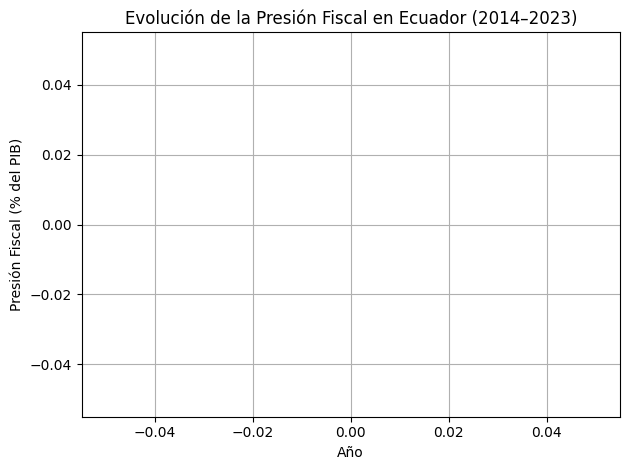

IndexError: index 0 is out of bounds for axis 0 with size 0

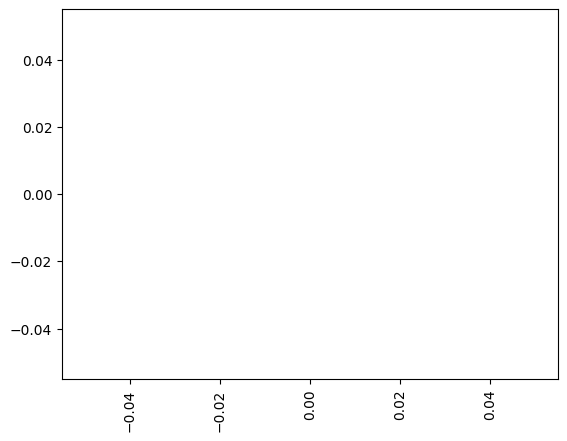

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Carpeta en Drive donde están los CSV
drive_folder = '/content/drive/MyDrive/Colab Notebooks'

# Rutas a los archivos
path_s13 = f'{drive_folder}/presion_fiscal_s13.csv'
path_all = f'{drive_folder}/presion_fiscal_all.csv'

# Carga de datos
df_s13 = pd.read_csv(path_s13)
df_all = pd.read_csv(path_all)

# 1) Filtrar en S13: Ecuador y serie total
df_ecu = (
    df_s13
    .loc[
        (df_s13['REF_AREA'] == 'ECU') &
        (df_s13['REVENUE_CODE'] == 'TPS_TOTAL')
    ]
    # Renombrar y fijar índice
    .rename(columns={
        'TIME_PERIOD': 'Año',
        'OBS_VALUE': 'Presión Fiscal'
    })
    .set_index('Año')
)

# 2) Gráfico de línea
plt.figure()
df_ecu['Presión Fiscal'].plot(marker='o')
plt.title('Evolución de la Presión Fiscal en Ecuador (2014–2023)')
plt.xlabel('Año')
plt.ylabel('Presión Fiscal (% del PIB)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3) Gráfico de barras
plt.figure()
df_ecu['Presión Fiscal'].plot(kind='bar')
plt.title('Presión Fiscal en Ecuador por Año')
plt.xlabel('Año')
plt.ylabel('Presión Fiscal (% del PIB)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4) Pivot en ALL para varias categorías
pivot = df_all.pivot(
    index='TIME_PERIOD',
    columns='REVENUE_CODE',
    values='OBS_VALUE'
)

print("Categorías disponibles en ALL:", pivot.columns.tolist())

# 5) Gráfico de líneas múltiples (ajusta códigos según lo que veas impreso)
plt.figure()
for code in ['TPS_TOTAL', 'TPS_TAXES_INC', 'TPS_TAXES_PROD']:
    if code in pivot.columns:
        plt.plot(pivot.index, pivot[code], marker='o', label=code)
plt.title('Presión Fiscal por categoría (ALL)')
plt.xlabel('Año')
plt.ylabel('% del PIB')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd

# Ruta al CSV S13 en tu Drive
path_s13 = '/content/drive/MyDrive/Colab Notebooks/presion_fiscal_s13.csv'
df_s13 = pd.read_csv(path_s13)

# 1) ¿Qué países hay en esta tabla?
print("Países disponibles (REF_AREA):", df_s13['REF_AREA'].unique())

# 2) ¿Qué códigos de Revenue tienes para ECUADOR?
mask_ecu = df_s13['REF_AREA'] == 'ECU'
print("Revenue codes para EC:", df_s13.loc[mask_ecu, 'REVENUE_CODE'].unique())

# 3) Muestra unas cuantas filas de Ecuador para ver la estructura
print(df_s13[mask_ecu].head(10))


Países disponibles (REF_AREA): ['ECU']
Revenue codes para EC: ['1100' '5100' '1000' '5124' '5300' '4500' '3000' '4320' '4110' '5122'
 '5112' '6100' '5125' '4210' '5212' '5128' '4520' '1210' '5000' '2000'
 '5123' '5200' '5126' '5130' '5113' '5127' '5121' '5111' '4300' '5220'
 '1120' '5120' '1200' '4120' '1300' '4100' '4400' '4310' '5213' '4220'
 '1110' '4200' '5110' '4510' '5211' '2400' '6000' '6200' '5210' '4000'
 'TOTALTAX' '4600' 'ECU_5111_L4' 'ECU_5121_L10' 'ECU_5111_L3'
 'ECU_5121_L5' 'ECU_5121_L1' 'ECU_5126_L6' 'ECU_5126_L4' 'ECU_5121_L2'
 'ECU_5126_L3' 'ECU_5126_L1' 'ECU_1210_L1' 'ECU_5126_L7' 'ECU_5211_L2'
 'ECU_5121_L12' 'ECU_5121_L3' 'ECU_5127_L1' 'ECU_1300_L2' 'ECU_1210_L2'
 'ECU_1300_L3' 'ECU_5211_L1' 'ECU_5121_L6' 'ECU_5121_L11' 'ECU_1300_L4'
 'ECU_5126_L9' 'ECU_6200_L2' 'ECU_6200_L3' 'ECU_5111_L5' 'ECU_5121_L9'
 'ECU_1110_L1' 'ECU_4510_L4' 'ECU_5126_L2' 'ECU_4510_L3' 'ECU_4100_L1'
 'ECU_6200_L1' 'ECU_4510_L1' 'ECU_4510_L2' 'ECU_1210_L3' 'ECU_1110_L2'
 'ECU_5126_L8' 'ECU_42

Filas encontradas para TOTALTAX: 10
     STRUCTURE                             STRUCTURE_ID  \
Año                                                       
2017  DATAFLOW  OECD.CTP.TPS:DSD_REV_LAC@DF_REVECU(2.0)   
2016  DATAFLOW  OECD.CTP.TPS:DSD_REV_LAC@DF_REVECU(2.0)   
2015  DATAFLOW  OECD.CTP.TPS:DSD_REV_LAC@DF_REVECU(2.0)   
2014  DATAFLOW  OECD.CTP.TPS:DSD_REV_LAC@DF_REVECU(2.0)   
2022  DATAFLOW  OECD.CTP.TPS:DSD_REV_LAC@DF_REVECU(2.0)   

                         STRUCTURE_NAME ACTION REF_AREA Reference area  \
Año                                                                      
2017  Details of tax revenue of Ecuador      I      ECU        Ecuador   
2016  Details of tax revenue of Ecuador      I      ECU        Ecuador   
2015  Details of tax revenue of Ecuador      I      ECU        Ecuador   
2014  Details of tax revenue of Ecuador      I      ECU        Ecuador   
2022  Details of tax revenue of Ecuador      I      ECU        Ecuador   

      MEASURE      Measure SECT

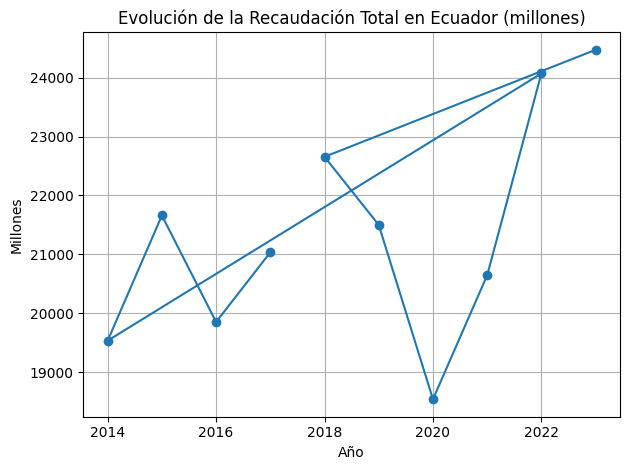

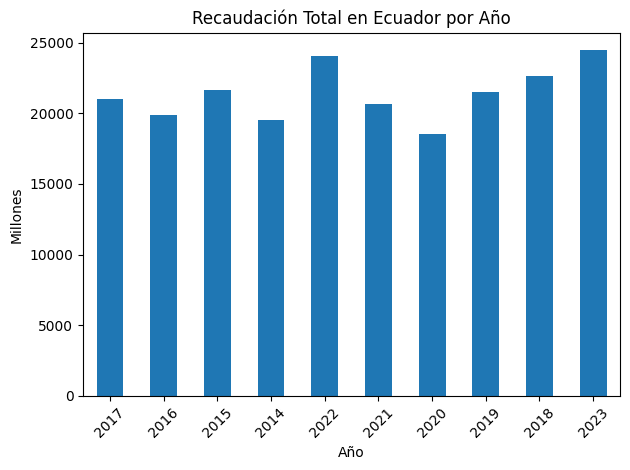

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Ruta al CSV S13
path_s13 = '/content/drive/MyDrive/Colab Notebooks/presion_fiscal_s13.csv'

# 2) Cargo el DataFrame
df_s13 = pd.read_csv(path_s13)

# 3) Filtro para Ecuador y “TOTALTAX”
df_ecu = (
    df_s13
    .loc[
        (df_s13['REF_AREA'] == 'ECU') &
        (df_s13['REVENUE_CODE'] == 'TOTALTAX')
    ]
    .rename(columns={
        'TIME_PERIOD': 'Año',
        'OBS_VALUE': 'Total Recaudación (millones)'
    })
    .set_index('Año')
)

# 4) Reviso cuántas filas trae
print(f"Filas encontradas para TOTALTAX: {len(df_ecu)}")
print(df_ecu.head())

# 5) Gráfico de línea
plt.figure()
df_ecu['Total Recaudación (millones)'].plot(marker='o')
plt.title('Evolución de la Recaudación Total en Ecuador (millones)')
plt.xlabel('Año')
plt.ylabel('Millones')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6) Gráfico de barras
plt.figure()
df_ecu['Total Recaudación (millones)'].plot(kind='bar')
plt.title('Recaudación Total en Ecuador por Año')
plt.xlabel('Año')
plt.ylabel('Millones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


4. Analisis exploratorio de datos

In [24]:
path_s13 = '/content/drive/MyDrive/Colab Notebooks/presion_fiscal_s13.csv'
path_all = '/content/drive/MyDrive/Colab Notebooks/presion_fiscal_all.csv'


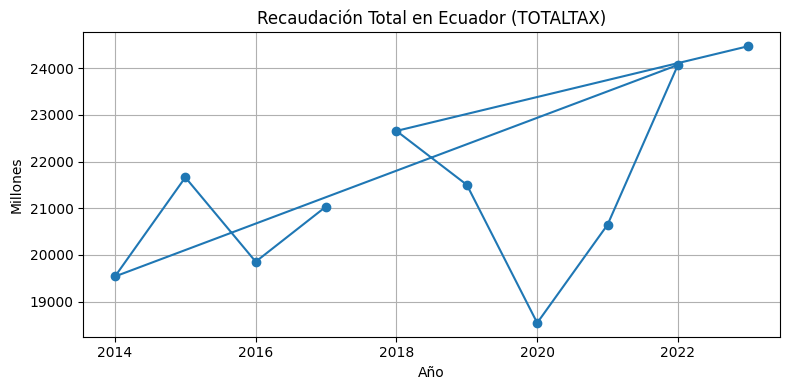

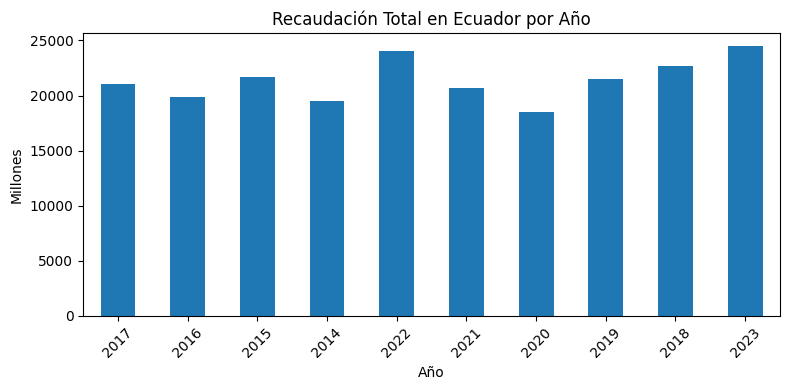

<Figure size 800x400 with 0 Axes>

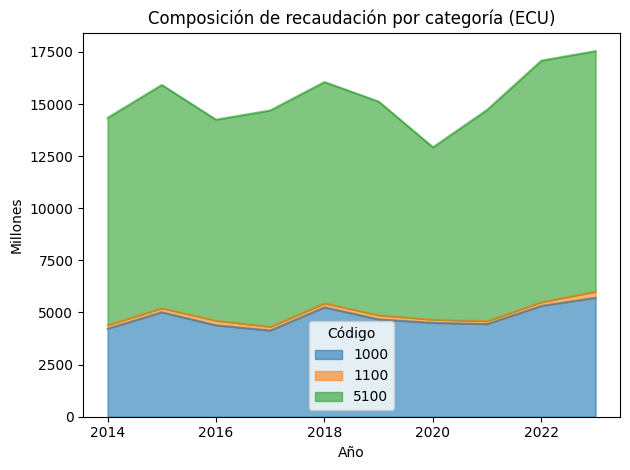

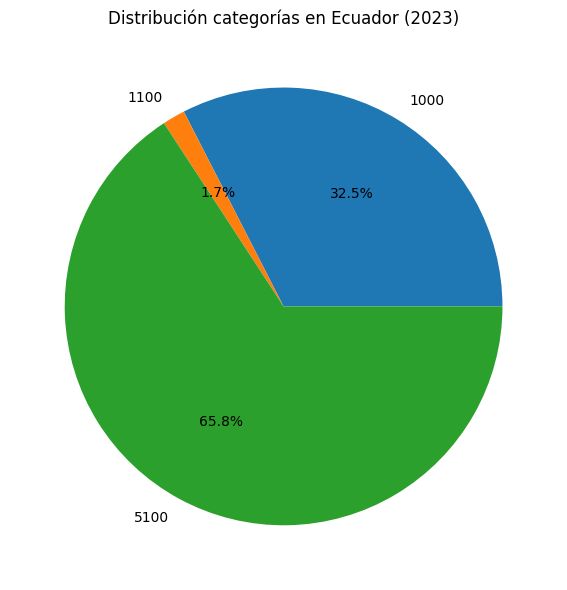

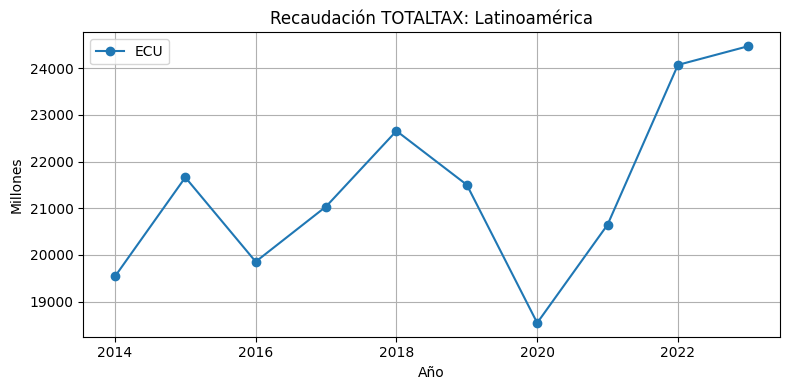

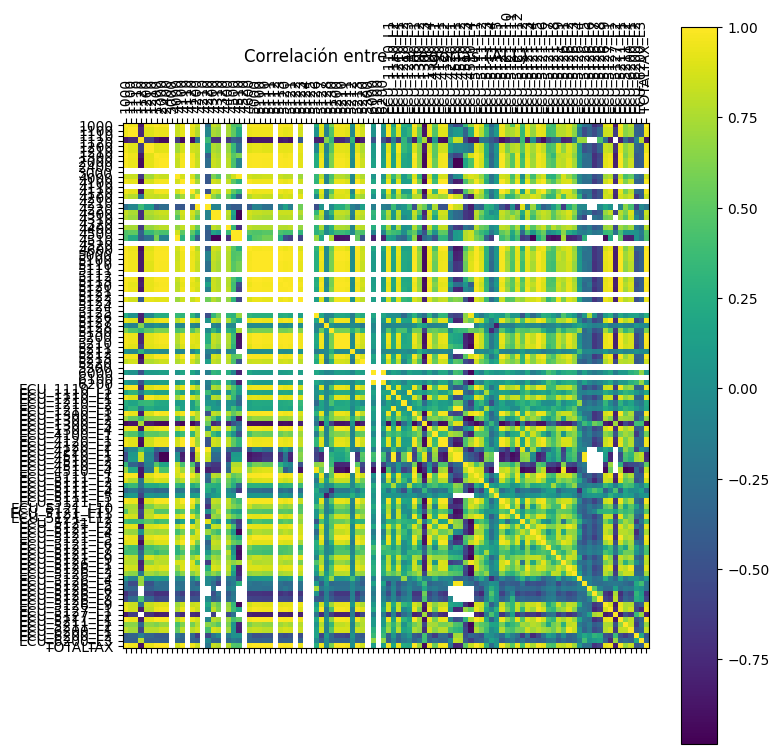

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# ——————————————————————————————
# AJUSTA ESTAS RUTAS a donde estén tus CSV en Colab o tu entorno
path_s13 = '/content/drive/MyDrive/Colab Notebooks/presion_fiscal_s13.csv'
path_all = '/content/drive/MyDrive/Colab Notebooks/presion_fiscal_all.csv'


# Carga de datos
df_s13 = pd.read_csv(path_s13)
df_all = pd.read_csv(path_all)

# 1) Filtrar Ecuador – TOTALTAX (recaudación total)
df_ecu_total = (
    df_s13
    .loc[
        (df_s13['REF_AREA']=='ECU') &
        (df_s13['REVENUE_CODE']=='TOTALTAX')
    ]
    .rename(columns={'TIME_PERIOD':'Año','OBS_VALUE':'Total Recaudación'})
    .set_index('Año')
)

# 2) Composición por categorías clave en Ecuador
codes_ecu = ['1100','5100','1000']  # categorías de ejemplo; ajusta si quieres otras
df_ecu_cat = (
    df_s13
    .loc[
        (df_s13['REF_AREA']=='ECU') &
        (df_s13['REVENUE_CODE'].isin(codes_ecu))
    ]
    .pivot(index='TIME_PERIOD', columns='REVENUE_CODE', values='OBS_VALUE')
)

# 3) Comparativo multipaís TOTALTAX
countries = ['ECU','BRA','MEX','ARG','COL']
df_multi = (
    df_s13
    .loc[
        (df_s13['REF_AREA'].isin(countries)) &
        (df_s13['REVENUE_CODE']=='TOTALTAX')
    ]
    .pivot(index='TIME_PERIOD', columns='REF_AREA', values='OBS_VALUE')
)

# 4) Correlación entre categorías (ALL) usando pivot_table
pivot_all = df_all.pivot_table(
    index='TIME_PERIOD',
    columns='REVENUE_CODE',
    values='OBS_VALUE',
    aggfunc='sum'
)
corr = pivot_all.corr()

# ——————————————————————————————
# DASHBOARDS

# 1) Serie temporal de recaudación total
plt.figure(figsize=(8,4))
df_ecu_total['Total Recaudación'].plot(marker='o')
plt.title('Recaudación Total en Ecuador (TOTALTAX)')
plt.xlabel('Año'); plt.ylabel('Millones')
plt.grid(True); plt.tight_layout()
plt.show()

# 2) Gráfico de barras de recaudación total
plt.figure(figsize=(8,4))
df_ecu_total['Total Recaudación'].plot(kind='bar')
plt.title('Recaudación Total en Ecuador por Año')
plt.xlabel('Año'); plt.ylabel('Millones')
plt.xticks(rotation=45); plt.tight_layout()
plt.show()

# 3) Área apilada: composición categorías en ECU
plt.figure(figsize=(8,4))
df_ecu_cat.plot(kind='area', alpha=0.6)
plt.title('Composición de recaudación por categoría (ECU)')
plt.xlabel('Año'); plt.ylabel('Millones')
plt.legend(title='Código'); plt.tight_layout()
plt.show()

# 4) Pie chart para último año disponible
latest = df_ecu_cat.index.max()
plt.figure(figsize=(6,6))
plt.pie(
    df_ecu_cat.loc[latest],
    labels=df_ecu_cat.columns,
    autopct='%1.1f%%'
)
plt.title(f'Distribución categorías en Ecuador ({latest})')
plt.tight_layout()
plt.show()

# 5) Comparativo multipaís TOTALTAX
plt.figure(figsize=(8,4))
for c in countries:
    if c in df_multi:
        plt.plot(df_multi.index, df_multi[c], marker='o', label=c)
plt.title('Recaudación TOTALTAX: Latinoamérica')
plt.xlabel('Año'); plt.ylabel('Millones')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

# 6) Heatmap de correlación entre categorías ALL
fig, ax = plt.subplots(figsize=(8,8))
cax = ax.matshow(corr)
fig.colorbar(cax)
ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticks(range(len(corr.index)))
ax.set_yticklabels(corr.index)
plt.title('Correlación entre categorías (ALL)', y=1.1)
plt.tight_layout()
plt.show()